# 1. Pytorch中的广播机制
如果一个Pytorch运算支持广播的话，那么就意味着传给这个运算的参数会被自动扩张成相同的size，在不复制数据的情况下就能进行运算，整个过程可以做到避免无用的复制，达到更高效的运算。<br>
广播机制实际上是在运算过程中，去处理两个形状不同向量的一种手段。<br>
pytorch中的广播机制和numpy中的广播机制一样, 因为都是数组的广播机制。

# 2. 广播机制的理解
以数组A和数组B的相加为例, 其余数学运算同理<br>
核心：如果相加的两个数组的shape不同, 就会触发广播机制：<br>
<ol>
<li>程序会自动执行操作使得A.shape==B.shape；</li>
<li>对应位置进行相加运算，结果的shape是：A.shape和B.shape对应位置的最大值，比如：A.shape=(1,9,4),B.shape=(15,1,4),那么A+B的shape是(15,9,4)
</li>
</ol>

# 3. 两个张量进行广播机制的条件
## 3.1 两个张量都至少有一个维度
```python
    #像下面这种情况下就不行，因为x不满足这个条件。
    x=torch.empty((0,))
    y=torch.empty(2,2)
```

## 3.2 按从右往左顺序看两个张量的每一个维度，x和y每个对应着的两个维度都需要能够匹配上。
什么情况下算是匹配上了？满足下面的条件就可以：<br>
<ul>
    <mark style="background-color: sandybrown">
              <li>这两个维度的大小相等</li>
              <li>某个维度 一个张量有，一个张量没有</li>
              <li>某个维度一个张量有，一个张量也有但大小是1</li>
    </mark>
</ul>             
如下举例：


```python
    x=torch.empty(5,3,4,1)
    y=torch.empty( 3,1,1)
```

如上面代码中，首先将两个张量维度向右靠齐，从右往左看，两个张量第四维大小相等，都为1，满足上面条件a;第三个维度大小不相等，但第二个张量第三维大小为1，满足上面条件b;第二个维度大小相等都为3，满足上面条件a;第一个维度第一个张量有，第二个张量没有，满足上面条件b，因此两个张量每个维度都符合上面广播条件，<mark style ="background-color: sandybrown">**因此可以进行广播**</mark>。

两个张量维度从右往左看，如果出现两个张量在某个维度位置上面，维度大小不相等，且两个维度大小没有一个是1，那么这两个张量一定不能进行广播。

# 4 当两个张量满足可广播条件后，具体怎么进行广播
```python
    x=torch.empty(5,3,4,1)
    y=torch.empty( 3,1,1)
```
如上面代码所示：

     a. 首先第一步，将上面条件b的类型变成条件c的类型，也即是把第二个张量在缺失维度的位置上新增一个维度，维度大小为1，新增的维度如下面所示。

    统一前:
```python
x=torch.empty(5,3,4,1)
y=torch.empty( 3,1,1)
```
    统一后：
```python
x=torch.empty(5,3,4,1)
y=torch.empty(1,3,1,1)
```

     b. 第二步，x、y对应维度不等的位置，把size为1的维度会被广播得和对应维度一样大，比如y中0维的1会变成5，y中2维的1会变成4，最后两个张量的维度大小变成一样，然后再进行张量运算，转变的维度如下所示。

    统一前:
```python
x=torch.empty(5,3,4,1)
y=torch.empty(1,3,1,1)
```
    统一后：
```python
x=torch.empty(5,3,4,1)
y=torch.empty(5,3,4,1)
```

# 5. 从空间上理解广播机制
## 5.1 一维张量进行广播，b被自动广播得和a一样的维度大小，完成了张量相乘运算，如下图所示。
```python
a = torch.tensor([1,2,3])
b = torch.tensor([2])
c = a*b
a,a.shape,b,b.shape,c,c.shape
```
输出结果如下：
```python
(tensor([1, 2, 3]),
 torch.Size([3]),
 tensor([2]),
 torch.Size([1]),
 tensor([2, 4, 6]),
 torch.Size([3]))
```
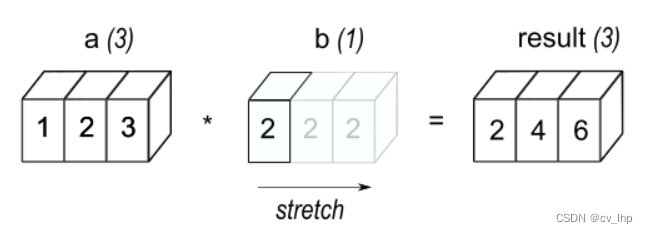
## 5.1 二维张量进行广播，b被自动广播得和a一样的维度大小，完成了张量相加运算，如下图所示。



```python
a = torch.tensor([[0],[10],[20],[30]])
b = torch.tensor([1,2,3])
c = a+b
a,a.shape,b,b.shape,c,c.shape
```
输出结果如下：
```python
(tensor([[ 0],
         [10],
         [20],
         [30]]),
 torch.Size([4, 1]),
 tensor([1, 2, 3]),
 torch.Size([3]),
 tensor([[ 1,  2,  3],
         [11, 12, 13],
         [21, 22, 23],
         [31, 32, 33]]),
 torch.Size([4, 3]))
```


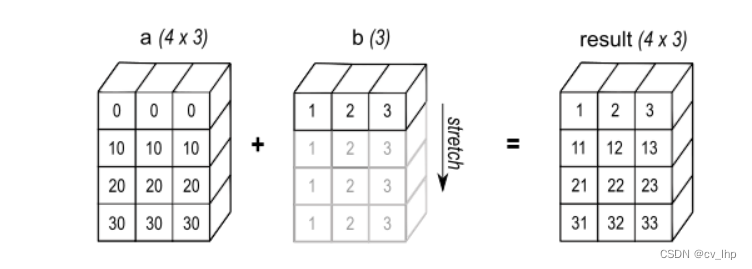

上面二维张量和一维张量相加运算进行广播过程为：a的形状是(4,1)，b的形状是(3)，如果a和b要匹配上，第一步给b新添一个维度，我们有：a的形状是(4,1)，b的形状是(1,3)；第二步二者各自把为1的维度进行广播，就如上图中那样进行广播，最后运算完成。